Exploration of RISE with image net (the author's own example model)

Function : Exploration of RISE with image net for first verification
Author : Team DIANNA
Contributor :
First Built : 2021.08.25
Last Update : 2021.08.25
Note : We ran the method using the image net model and various images from the internet. Results look as expected. Heatmaps make sense.

In [2]:
import os
import dianna
import onnx
import onnxruntime
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras import backend as K
from keras.preprocessing import image
import pandas as pd
from dianna import visualization
from dianna.methods import RISE

In [3]:
class Model():
    def __init__(self):
        K.set_learning_phase(0)
        self.model = ResNet50()
        self.input_size = (224, 224)
        
    def run_on_batch(self, x):
        return self.model.predict(x)

In [4]:
def load_img(path):
    img = image.load_img(path, target_size=model.input_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

In [5]:
def class_name(idx):
    return decode_predictions(np.eye(1, 1000, idx))[0][0][1]

In [6]:
model = Model()

/Users/loostrum/pyenv/versions/3.9.1/envs/onnx/lib/python3.9/site-packages/keras/backend.py:401: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


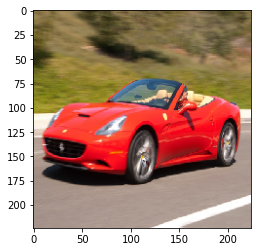

In [7]:
img, x = load_img('ferrari.jpg')
plt.imshow(img)

# Predict classes for test data

Print class and image of a single instance in the test data

In [11]:
class_idx = np.argmax(model.model.predict([x]))
print(class_idx)
class_name(class_idx)

817


'sports_car'

In [8]:
# heatmaps = dianna.explain(model.run_on_batch, x, method="RISE", n_masks=2000, feature_res=8)

In [12]:
# investigate which value for p_keep works best by looking at the stddev of the probabilities for the target class,
def print_stats(p_keep):
    n_masks = 50
    feature_res = 8
    explainer = RISE(n_masks=n_masks, feature_res=feature_res, p_keep=p_keep)
    explainer(model.run_on_batch, x)
    preds = explainer.predictions[:, class_idx]
    df = pd.DataFrame(preds)
    display(df.describe())
    
print_stats(.5)  # stddev .15 is a bit low maybe, but min/max value of .16 and .93 seem fine

Explaining: 100%|██████████| 1/1 [00:02<00:00,  2.48s/it]


,0
count,50.000000
mean,0.761799
std,0.149807
min,0.162484
25%,0.710012
50%,0.806392
75%,0.868807
max,0.926847


In [13]:
explainer = RISE(n_masks=600, feature_res=8, p_keep=.5)
heatmaps = explainer(model.run_on_batch, x)

Explaining: 100%|██████████| 6/6 [00:22<00:00,  3.70s/it]


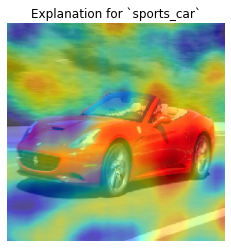

In [14]:
plt.title('Explanation for `{}`'.format(class_name(class_idx)))
plt.axis('off')
plt.imshow(img)
plt.imshow(heatmaps[class_idx], cmap='jet', alpha=0.5)
# plt.colorbar()
plt.show()

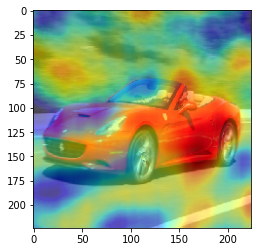

In [15]:
visualization.plot_image(heatmaps[class_idx], image.img_to_array(img)/255., heatmap_cmap='jet')
# visualization.plot_image(heatmaps[class_idx], heatmap_cmap='gray')

# Conclusion
RISE higlights part of the car, so it seems to work. Proper tuning of p_keep is important.

In [16]:
def describe(arr):
    print('shape:',arr.shape, 'min:',np.min(arr), 'max:',np.max(arr), 'std:',np.std(arr))

describe(heatmaps[class_idx])

shape: (224, 224) min: 0.6726215532485678 max: 0.7956915909370292 std: 0.02423527978789652


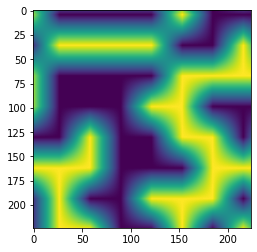

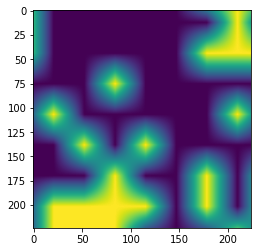

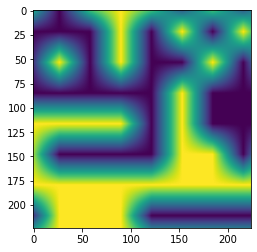

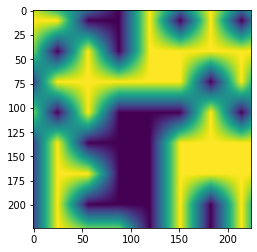

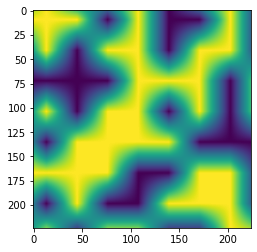

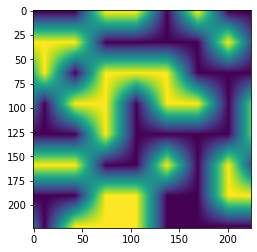

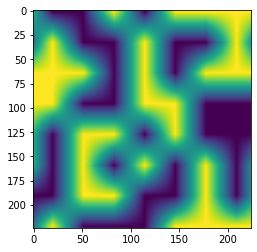

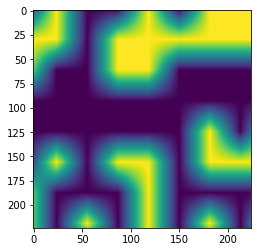

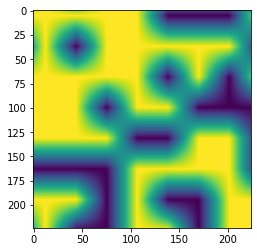

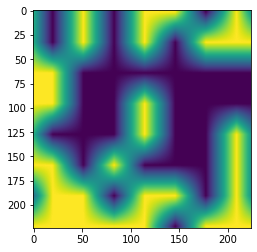

In [17]:
for i in range(10):
    plt.imshow(explainer.masks[i])
    plt.show()